In [5]:
def get_sorce(ref_name,est_name):
    import mir_eval
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    scores = []
    for i in range(1,201):
        try:
            #ref_path = './data/{0}/annotations/Labels/{1:03d}.txt'.format(ref_name,i)
            ref_path = '../old_ce200/CE200/{}/ground_truth.txt'.format(i)
            est_path = './test/result/{0}/{1:03d}.lab'.format(est_name,i)
            ref_intervals,ref_labels = mir_eval.io.load_labeled_intervals(ref_path)
            est_intervals,est_labels = mir_eval.io.load_labeled_intervals(est_path)
            est_intervals, est_labels = mir_eval.util.adjust_intervals(est_intervals, est_labels, ref_intervals.min(),ref_intervals.max(), mir_eval.chord.NO_CHORD,mir_eval.chord.NO_CHORD)
            (intervals,ref_labels,est_labels) = mir_eval.util.merge_labeled_intervals(ref_intervals, ref_labels, est_intervals, est_labels)
            durations = mir_eval.util.intervals_to_durations(intervals)
            comparisons = mir_eval.chord.sevenths(ref_labels, est_labels)
            score = mir_eval.chord.weighted_accuracy(comparisons, durations)
            scores.append(score)
        except:
            scores.append(0)
    plt.figure(figsize=(15,5))
    sns.distplot(scores)
    return np.array(scores).mean()


/opt/conda/lib/python3.7/site-packages/mir_eval/io.py:240: UserWarning: All interval durations must be strictly positive
  warnings.warn(error.args[0])


0.749479973827889

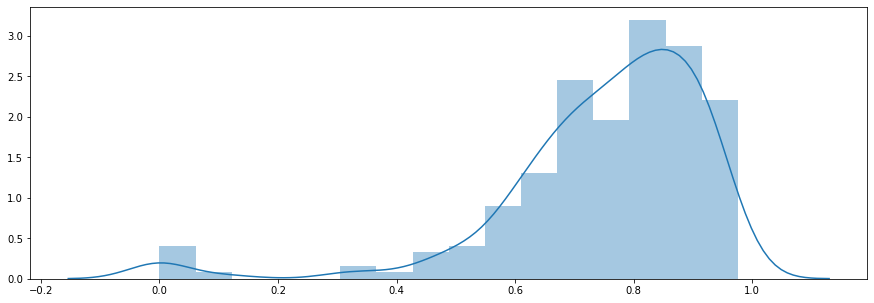

In [6]:
get_sorce('ce200','idx_0')

/opt/conda/lib/python3.7/site-packages/mir_eval/io.py:240: UserWarning: All interval durations must be strictly positive
  warnings.warn(error.args[0])


0.7419336132413423

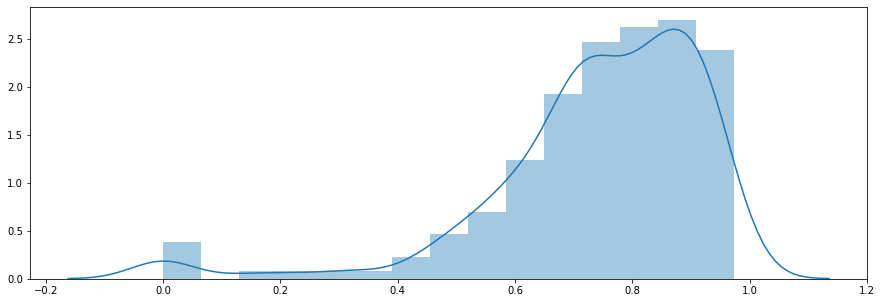

In [16]:
get_sorce('ce200','idx_1')

/opt/conda/lib/python3.7/site-packages/mir_eval/io.py:240: UserWarning: All interval durations must be strictly positive
  warnings.warn(error.args[0])


0.6315876688117913

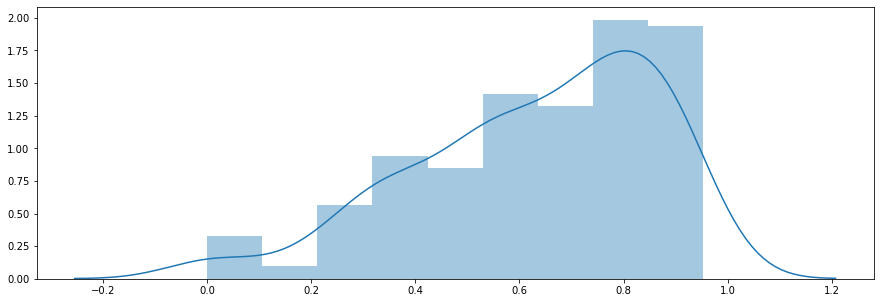

In [17]:
get_sorce('ce200','idx_2')

/opt/conda/lib/python3.7/site-packages/mir_eval/io.py:240: UserWarning: All interval durations must be strictly positive
  warnings.warn(error.args[0])


0.7093186511959116

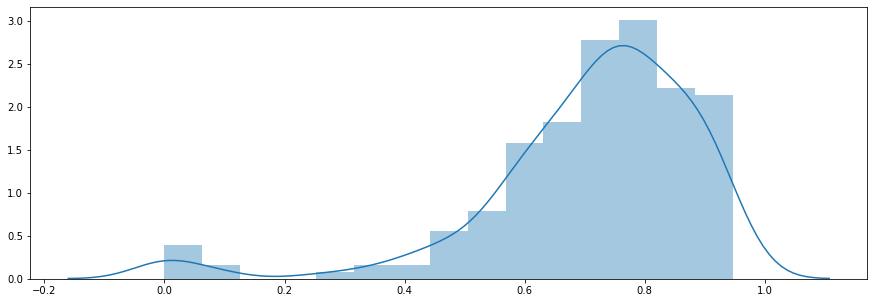

In [18]:
get_sorce('ce200','idx_3')

In [2]:
import json
est_name = 'idx_3'
result = {}
for c in range(1,201):
    try:
        f  = open('./test/result/{0}/{1:03d}.lab'.format(est_name,c),'r')
        txt = f.readlines()
        tmps = []
        for i in range(len(txt)):
            line = txt[i].split(' ')
            tmp = [float(i) for i in line[:2]]
            tmp.append(line[2].replace('\n',""))
            tmps.append(tmp)
        result[str(c)] = tmps
    except:
        result[str(c)] = [[0.0,1.0,'N']]

with open('test/score/'+est_name+'.json', 'w') as outfile:
    json.dump(result, outfile)

In [44]:
def pl(est_name,i,st,ed):
    
    import mir_eval
    import numpy as np
    import seaborn as sns
    import matplotlib._color_data as mcd
    import matplotlib.pyplot as plt
    from collections import OrderedDict
    scores = []
    #est_name = 'idx_0'
    #ref_path = './data/{0}/annotations/Labels/{1:03d}.txt'.format(ref_name,i)
    ref_path = '../old_ce200/CE200/{}/ground_truth.txt'.format(i)
    est_path = './test/result/{0}/{1:03d}.lab'.format(est_name,i)
    ref_intervals,ref_labels = mir_eval.io.load_labeled_intervals(ref_path)
    est_intervals,est_labels = mir_eval.io.load_labeled_intervals(est_path)
    est_intervals, est_labels = mir_eval.util.adjust_intervals(est_intervals, est_labels, ref_intervals.min(),ref_intervals.max(),\
                                                               mir_eval.chord.NO_CHORD,mir_eval.chord.NO_CHORD)
    intervals,ref_labels,est_labels = mir_eval.util.merge_labeled_intervals(ref_intervals, ref_labels, est_intervals, est_labels)

    tr = ['C','D','E','F','G','A','B']
    for i in range(len(est_labels)):
        if est_labels[i] in tr:
            est_labels[i] = est_labels[i]+':maj'
            
    tr = ['C#','D#','E#','F#','G#','A#','B#']
    for i in range(len(est_labels)):
        for t in range(len(tr)):
            if est_labels[i][:2] in tr[t]:
                try:
                    #print(est_labels[i],tr[t+1][0] +'b:maj',t)
                    est_labels[i] = tr[t+1][0] +'b:maj'
                except:
                    est_labels[i] = tr[0]+'b:maj'


    ch = list(set(ref_labels+est_labels))
    dic = {}
    c = [t for t in mcd.XKCD_COLORS]
    for i in range(len(ch)):
        dic[ch[i]] = mcd.XKCD_COLORS[c[i]]

    results = {'durations_ref':  [intervals[i][0]for i in range(st,ed)]}
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(ed-st, 1.5),dpi=100)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, colname in enumerate(ref_labels[st:ed]):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, 
                color=dic[colname]
               )

        for y, (x, c) in enumerate(zip(starts, widths)):
            ax.text(x, y, str(round(c,1)), ha='center', va='center',
                    color='0',rotation = 45)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),ncol=len(list(set(labels))),loc='upper left', fontsize='small')


    results = {'durations_est':  [intervals[i][0]for i in range(st,ed)]}
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    fig, ax = plt.subplots(figsize=(ed-st, 1.5),dpi=100)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, colname in enumerate(est_labels[st:ed]):
        widths = data[:,i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, 
                color=dic[colname]
               )
        for y, (x, c) in enumerate(zip(starts, widths)):
            ax.text(x, y, str(round(c,1)), ha='center', va='center',
                    color='0',rotation = 45)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),ncol=len(list(set(labels))),loc='upper left', fontsize='small')

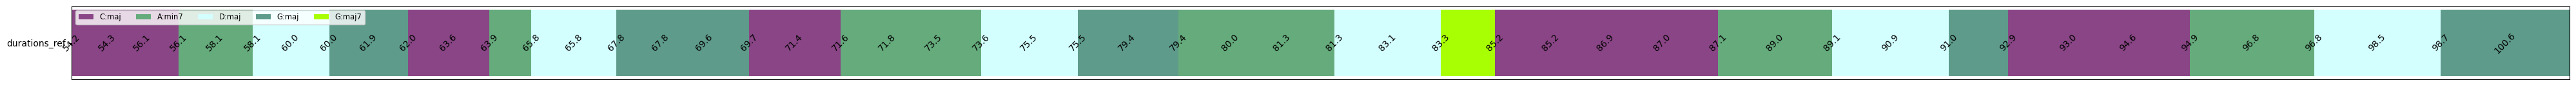

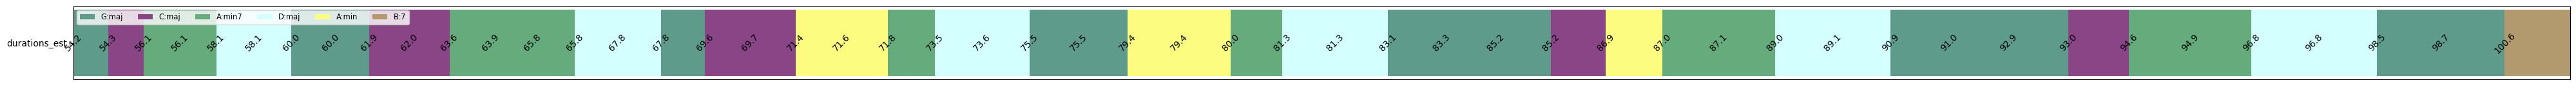

In [45]:
pl('idx_0',3,50,100)